# House Prices Dataset - Exploratory Data Analysis
In this notebook, we will perform an enhanced exploratory data analysis (EDA) on the House Prices dataset. The analysis will include data loading, cleaning, preprocessing, and feature engineering, accompanied by visualizations to illustrate our findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load the dataset
# df_test = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
# df_train = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

# Concatenate the datasets vertically, I don't want to have to apply all my transformations twice
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df.set_index("Id", inplace=True)

df = df[df['SaleCondition'] == 'Normal']


In [3]:
# Display the first five rows
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                  ...                                      
1          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
6          Lvl    AllPub    Inside  ...        0    NaN  MnPrv        Shed   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
5        0     12    2008        WD         Normal     250000  
6      700     10    2009        WD         Normal     143000  

[5 rows x 80 columns]

In [4]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1198 non-null   int64  
 1   MSZoning       1198 non-null   object 
 2   LotFrontage    961 non-null    float64
 3   LotArea        1198 non-null   int64  
 4   Street         1198 non-null   object 
 5   Alley          71 non-null     object 
 6   LotShape       1198 non-null   object 
 7   LandContour    1198 non-null   object 
 8   Utilities      1198 non-null   object 
 9   LotConfig      1198 non-null   object 
 10  LandSlope      1198 non-null   object 
 11  Neighborhood   1198 non-null   object 
 12  Condition1     1198 non-null   object 
 13  Condition2     1198 non-null   object 
 14  BldgType       1198 non-null   object 
 15  HouseStyle     1198 non-null   object 
 16  OverallQual    1198 non-null   int64  
 17  OverallCond    1198 non-null   int64  
 18  YearBuilt    

In [5]:
# Statistical summary of numerical features
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1198.000000   961.000000    1198.000000  1198.000000  1198.000000   
mean     57.378965    69.124870   10543.478297     6.006678     5.659432   
std      42.495957    22.993908   10681.016803     1.318193     1.139790   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7544.500000     5.000000     5.000000   
50%      50.000000    69.000000    9468.500000     6.000000     5.000000   
75%      70.000000    80.000000   11451.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1198.000000   1198.000000  1194.000000  1198.000000  1198.000000  ...   
mean   1969.030885   1983.702003    96.550251   439.469115    49.656928  ...   
std      29.493948     20.277577   175.966476   407.738366   165.364972  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1952.000000   1965.250000     0.000000     0.000000     0.000000  ...   
50%    1971.000000   1992.000000     0.000000   400.000000     0.000000  ...   
75%    1997.750000   2002.000000   148.000000   700.000000     0.000000  ...   
max    2009.000000   2010.000000  1600.000000  1880.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1198.000000  1198.000000    1198.000000  1198.000000  1198.000000   
mean     95.853923    43.698664      22.696160     3.283806    15.336394   
std     128.818315    63.168287      60.798182    29.397167    56.738561   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    22.000000       0.000000     0.000000     0.000000   
75%     168.000000    63.750000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     386.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1198.000000   1198.000000  1198.000000  1198.000000    1198.000000  
mean      1.454925     52.103506     6.231219  2007.897329  175202.219533  
std      29.169872    546.941904     2.638471     1.313248   69713.636280  
min       0.000000      0.000000     1.000000  2006.000000   39300.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130000.000000  
50%       0.000000      0.000000     6.000000  2008.000000  160000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  205000.000000  
max     648.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In the above, we imported the necessary libraries and loaded the dataset into a Pandas DataFrame. We displayed the first few rows to get an initial understanding of the data. Using df.info() and df.describe(), we obtained summaries of the dataset, which help identify data types and basic statistical properties. We also separated the features into numerical and categorical for targeted analysis.

## Dealing with Missing Values

In [6]:
# Total missing values per feature
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values


Electrical         1
MasVnrArea         4
BsmtQual          32
BsmtCond          32
BsmtFinType1      32
BsmtExposure      33
BsmtFinType2      33
GarageCond        61
GarageQual        61
GarageFinish      61
GarageYrBlt       61
GarageType        61
LotFrontage      237
FireplaceQu      563
MasVnrType       739
Fence            957
Alley           1127
MiscFeature     1148
PoolQC          1195
dtype: int64

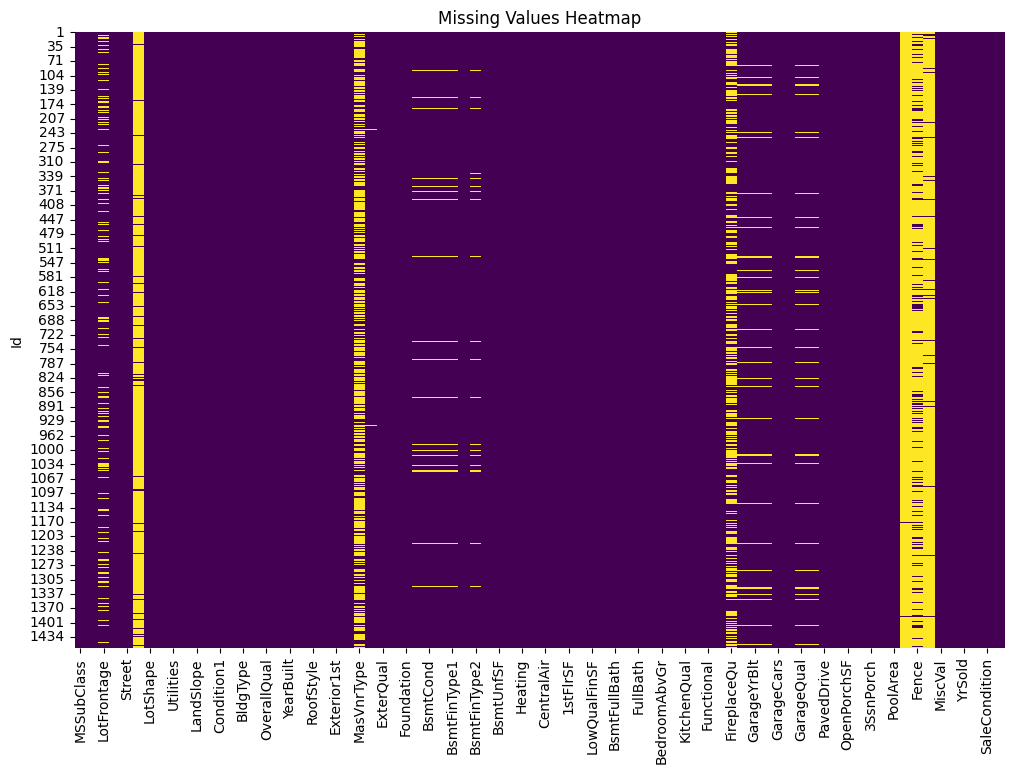

In [7]:
# Visualizing missing data with a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Features:", numerical_features)
# List of categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)
# Impute or drop missing values based on feature characteristics
# For numerical features, we can use median imputation
num_with_nan = [feature for feature in numerical_features if df[feature].isnull().sum() > 0]
for feature in num_with_nan:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

# For categorical features, we can use mode imputation
cat_with_nan = [feature for feature in categorical_features if df[feature].isnull().sum() > 0]
for feature in cat_with_nan:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',

/var/folders/7v/3br959qn2kv_g8t6w_nhm7qh0000gn/T/ipykernel_13177/193207870.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(median_value, inplace=True)
/var/folders/7v/3br959qn2kv_g8t6w_nhm7qh0000gn/T/ipykernel_13177/193207870.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

We identified features with missing values and visualized them using a heatmap. For numerical features with missing values, we used median imputation to fill in the missing data. For categorical features, mode imputation was applied. These methods help in retaining the dataset's integrity without losing valuable information. We can clearly see that some features are very sparse and will probably not help us much in our further analysis

## Exploratory Data Analysis

# Histograms for numerical features

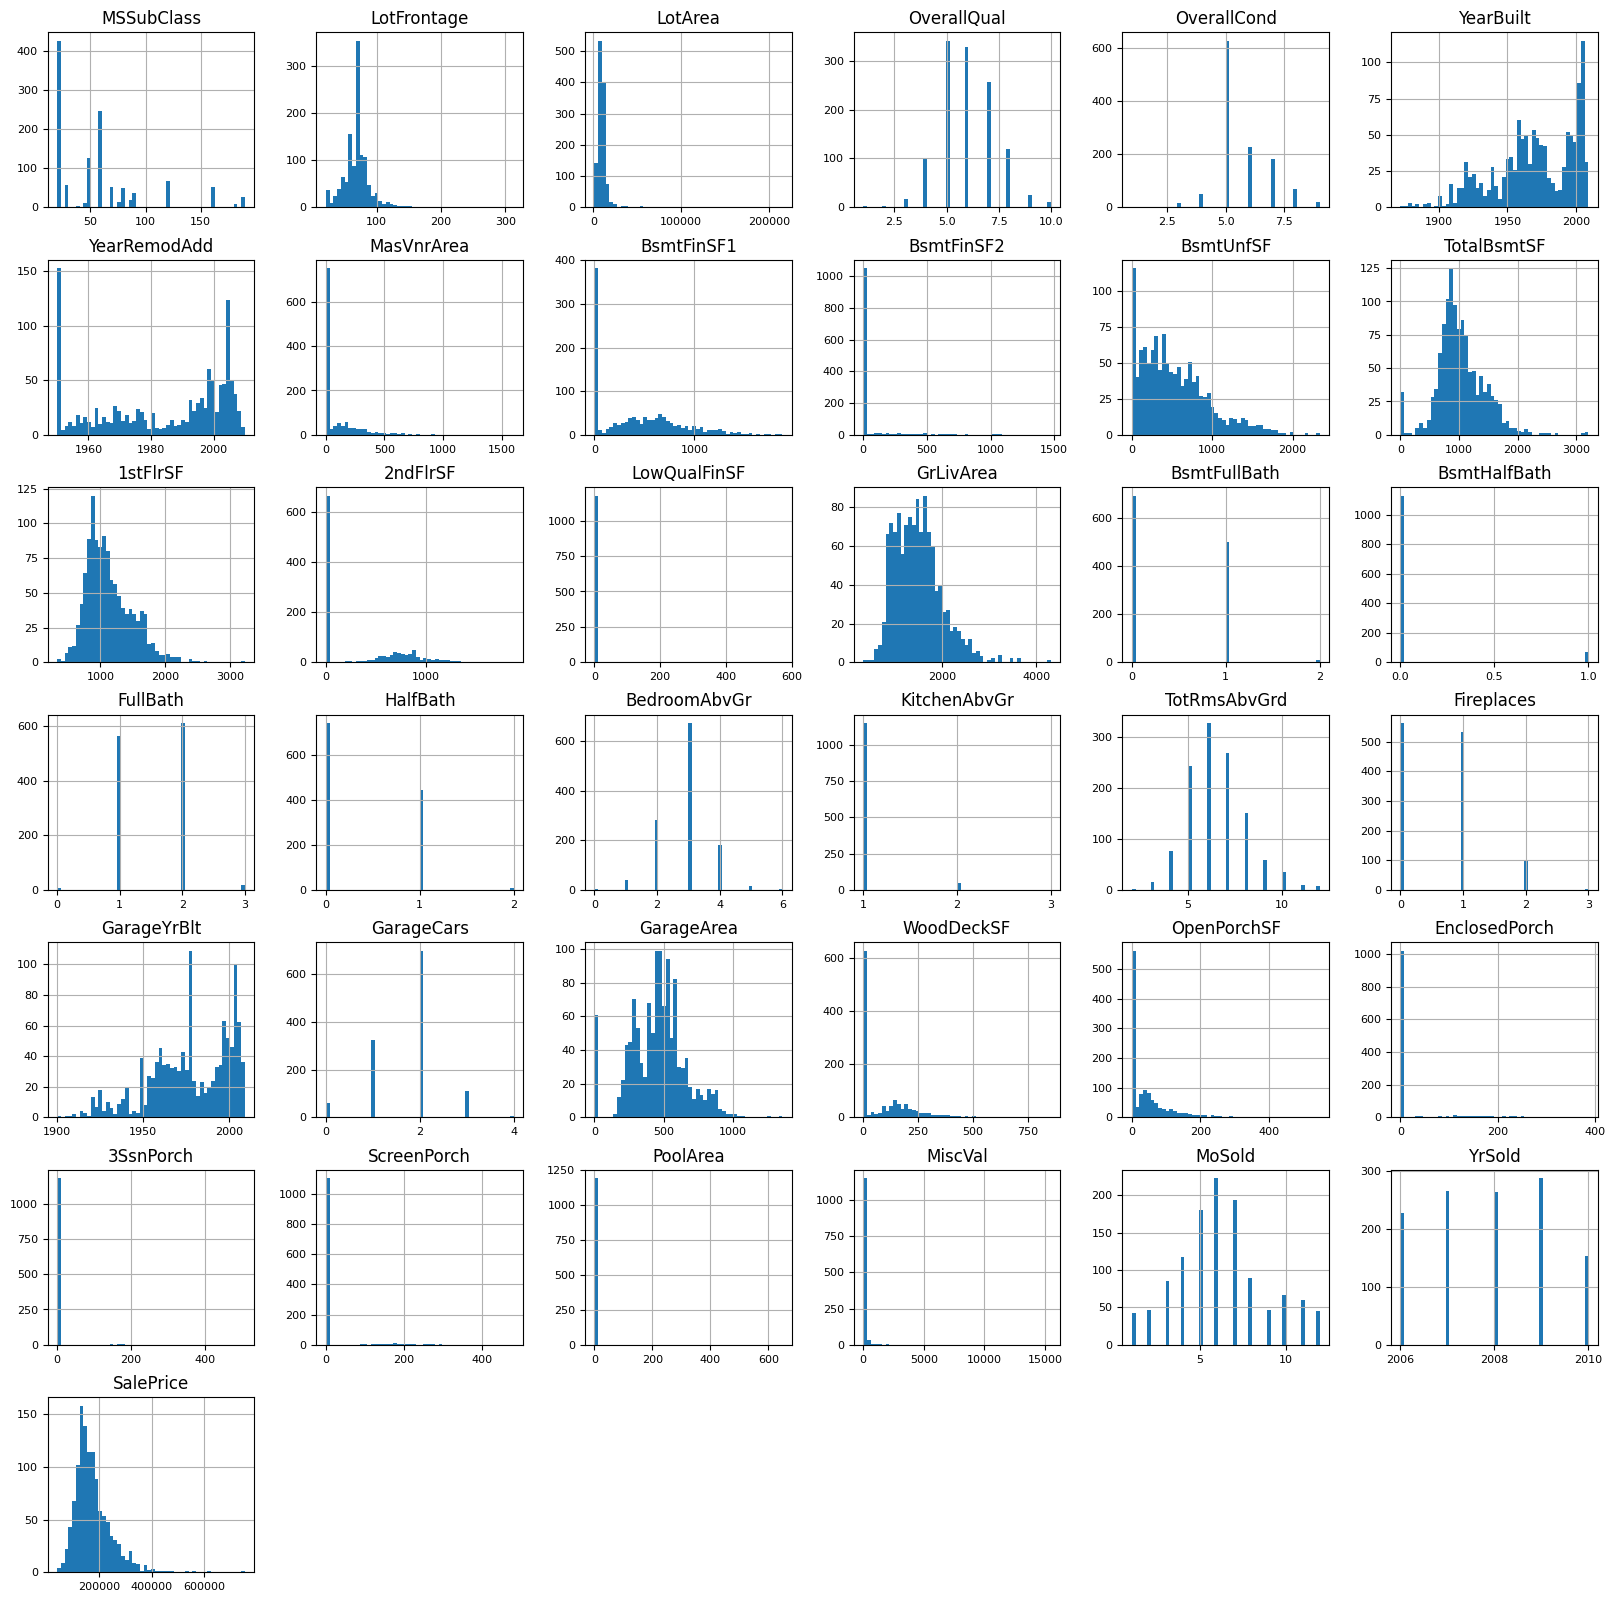

In [9]:
df[numerical_features].hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

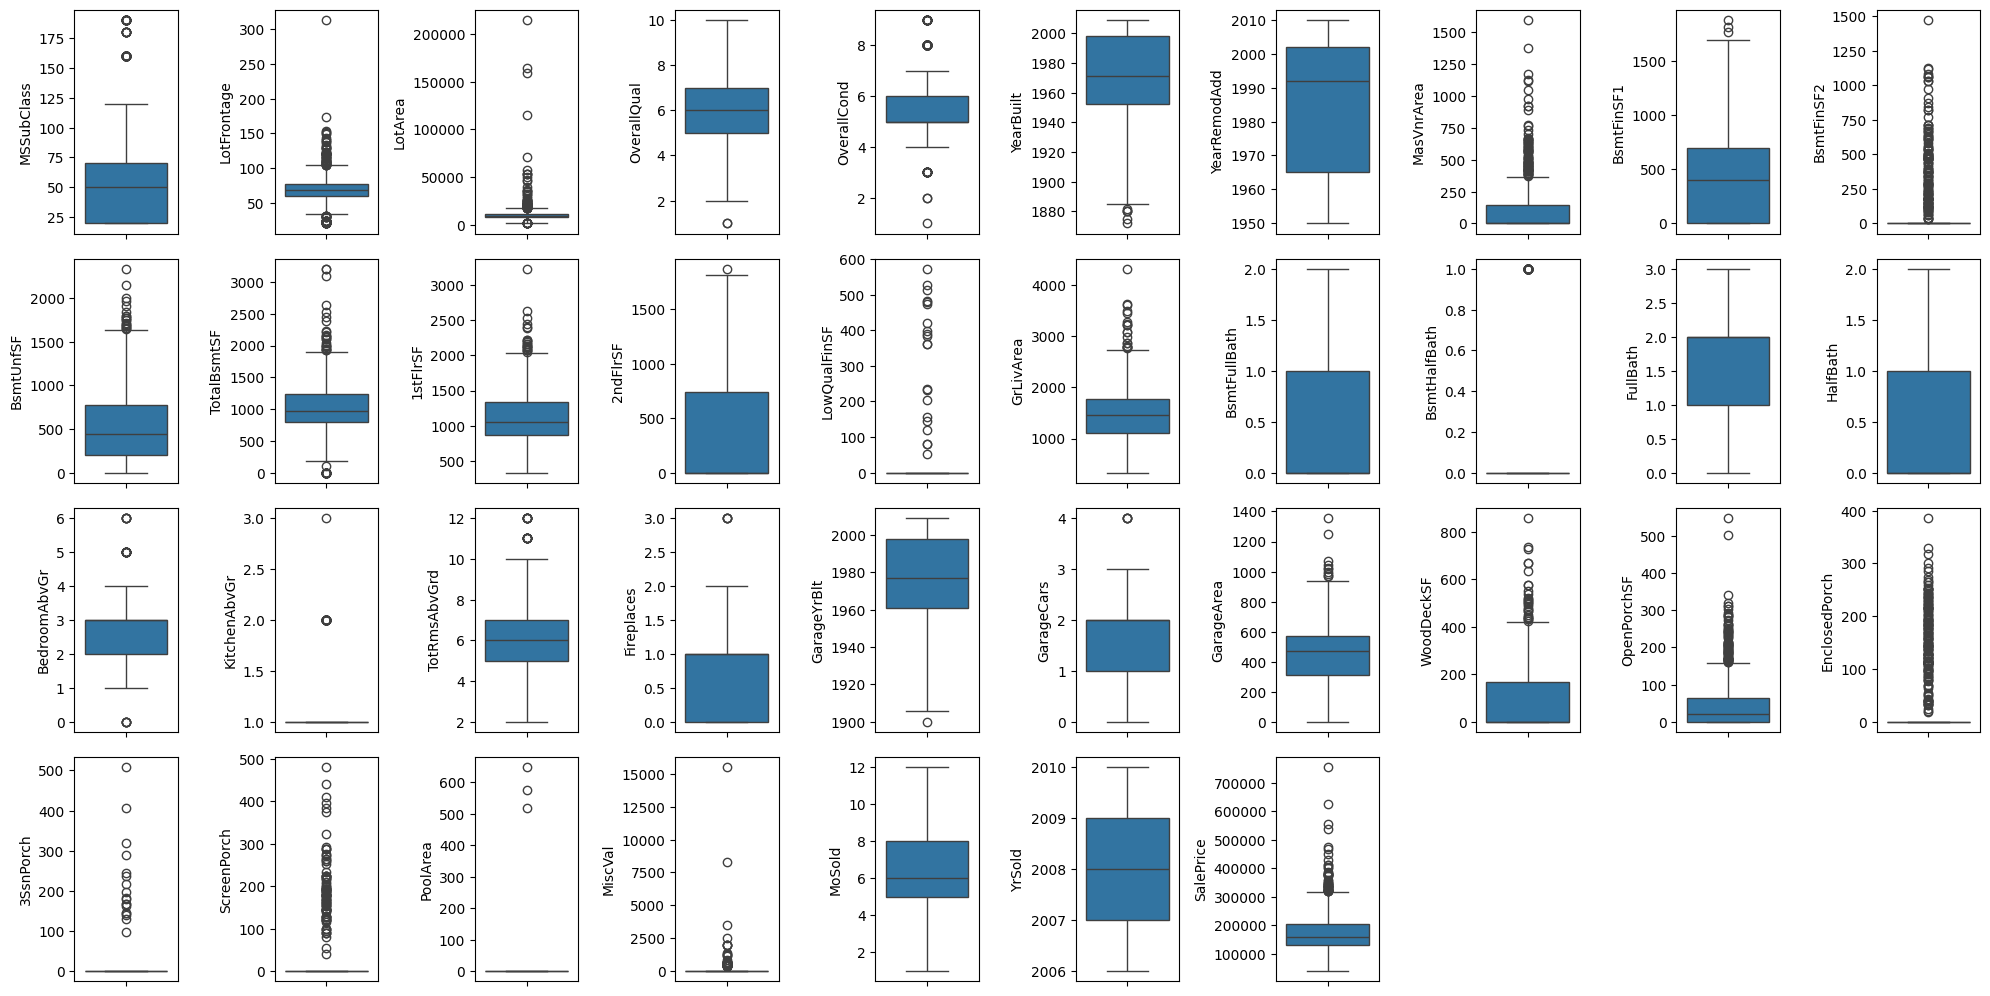

In [10]:
# Box plots to check for outliers
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(6, 10, i+1)
    sns.boxplot(y=feature, data=df)
    plt.tight_layout()


Several features, such as LotFrontage, LotArea, MasVnrArea, and GrLivArea, show significant outliers, indicated by points outside the whiskers.
Features like GarageYrBlt, PoolArea, and MiscVal also exhibit notable outliers, something we will need to consider when construction our prediction model.

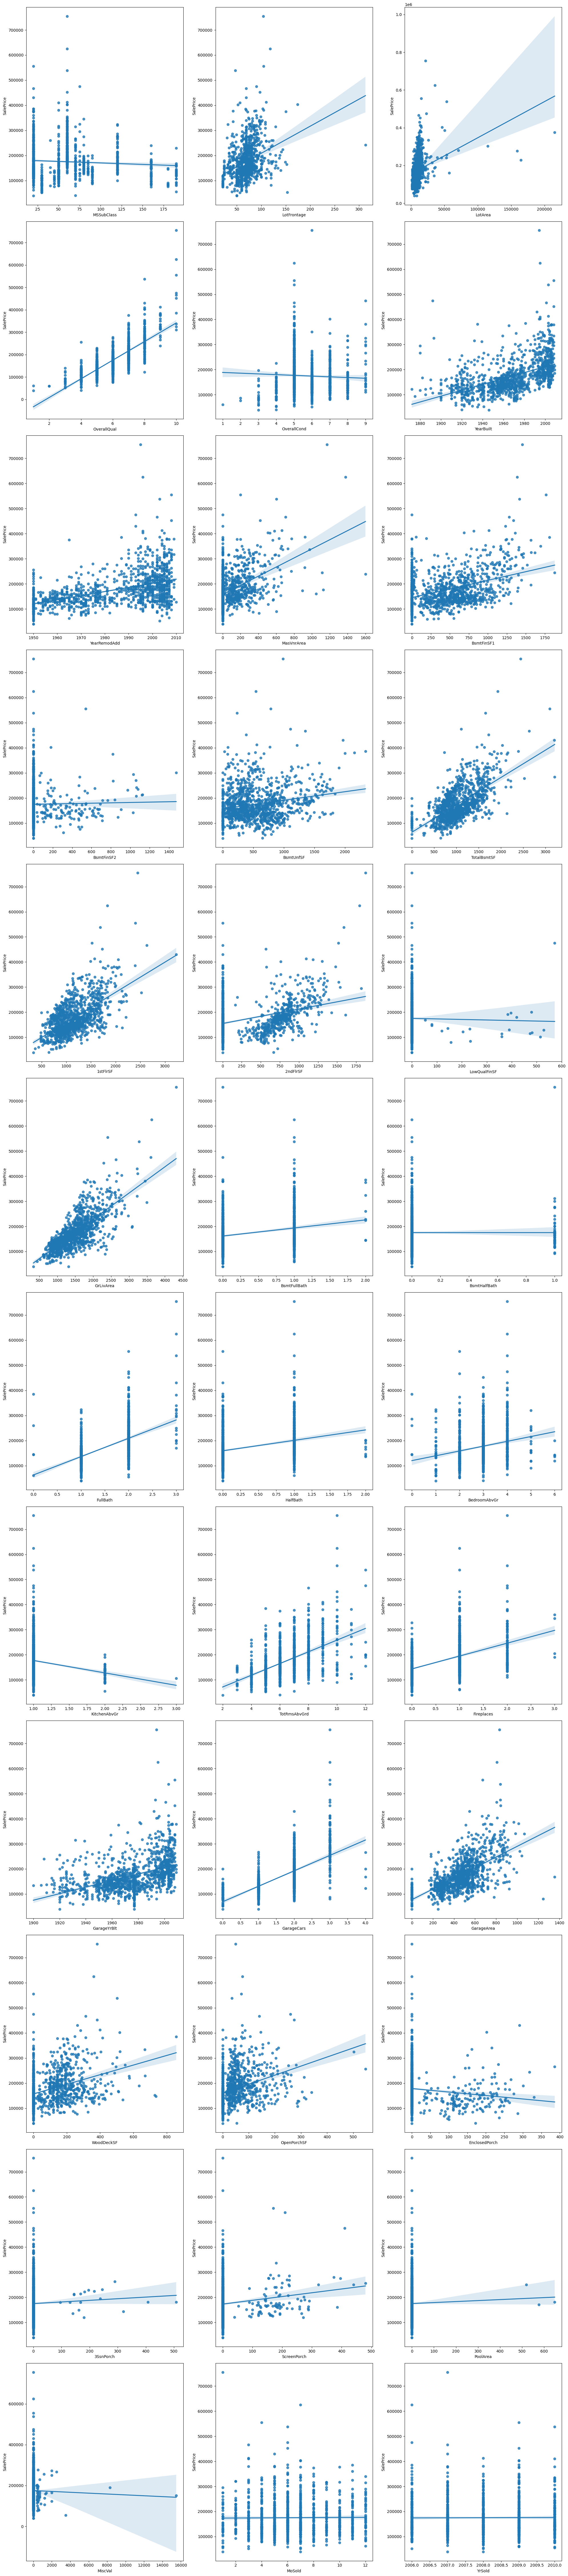

In [11]:
plt.figure(figsize=(20, 150))
for i, feature in enumerate(numerical_features):
    if feature != 'SalePrice' and feature != 'Id':
        plt.subplot(20,3 , i+1)
        sns.regplot(x=feature,y='SalePrice', data=df)
        plt.tight_layout()


Thanks to seaborn's awesome regplots, we can see some highly variables highly correlated with saleprice, like year built and first floor square footage. Something to be aware of for later is that things like year built and garage year built are likely highly correlated so we may want to disregard one of these later.

Lets inspect these in a correlation matrix:

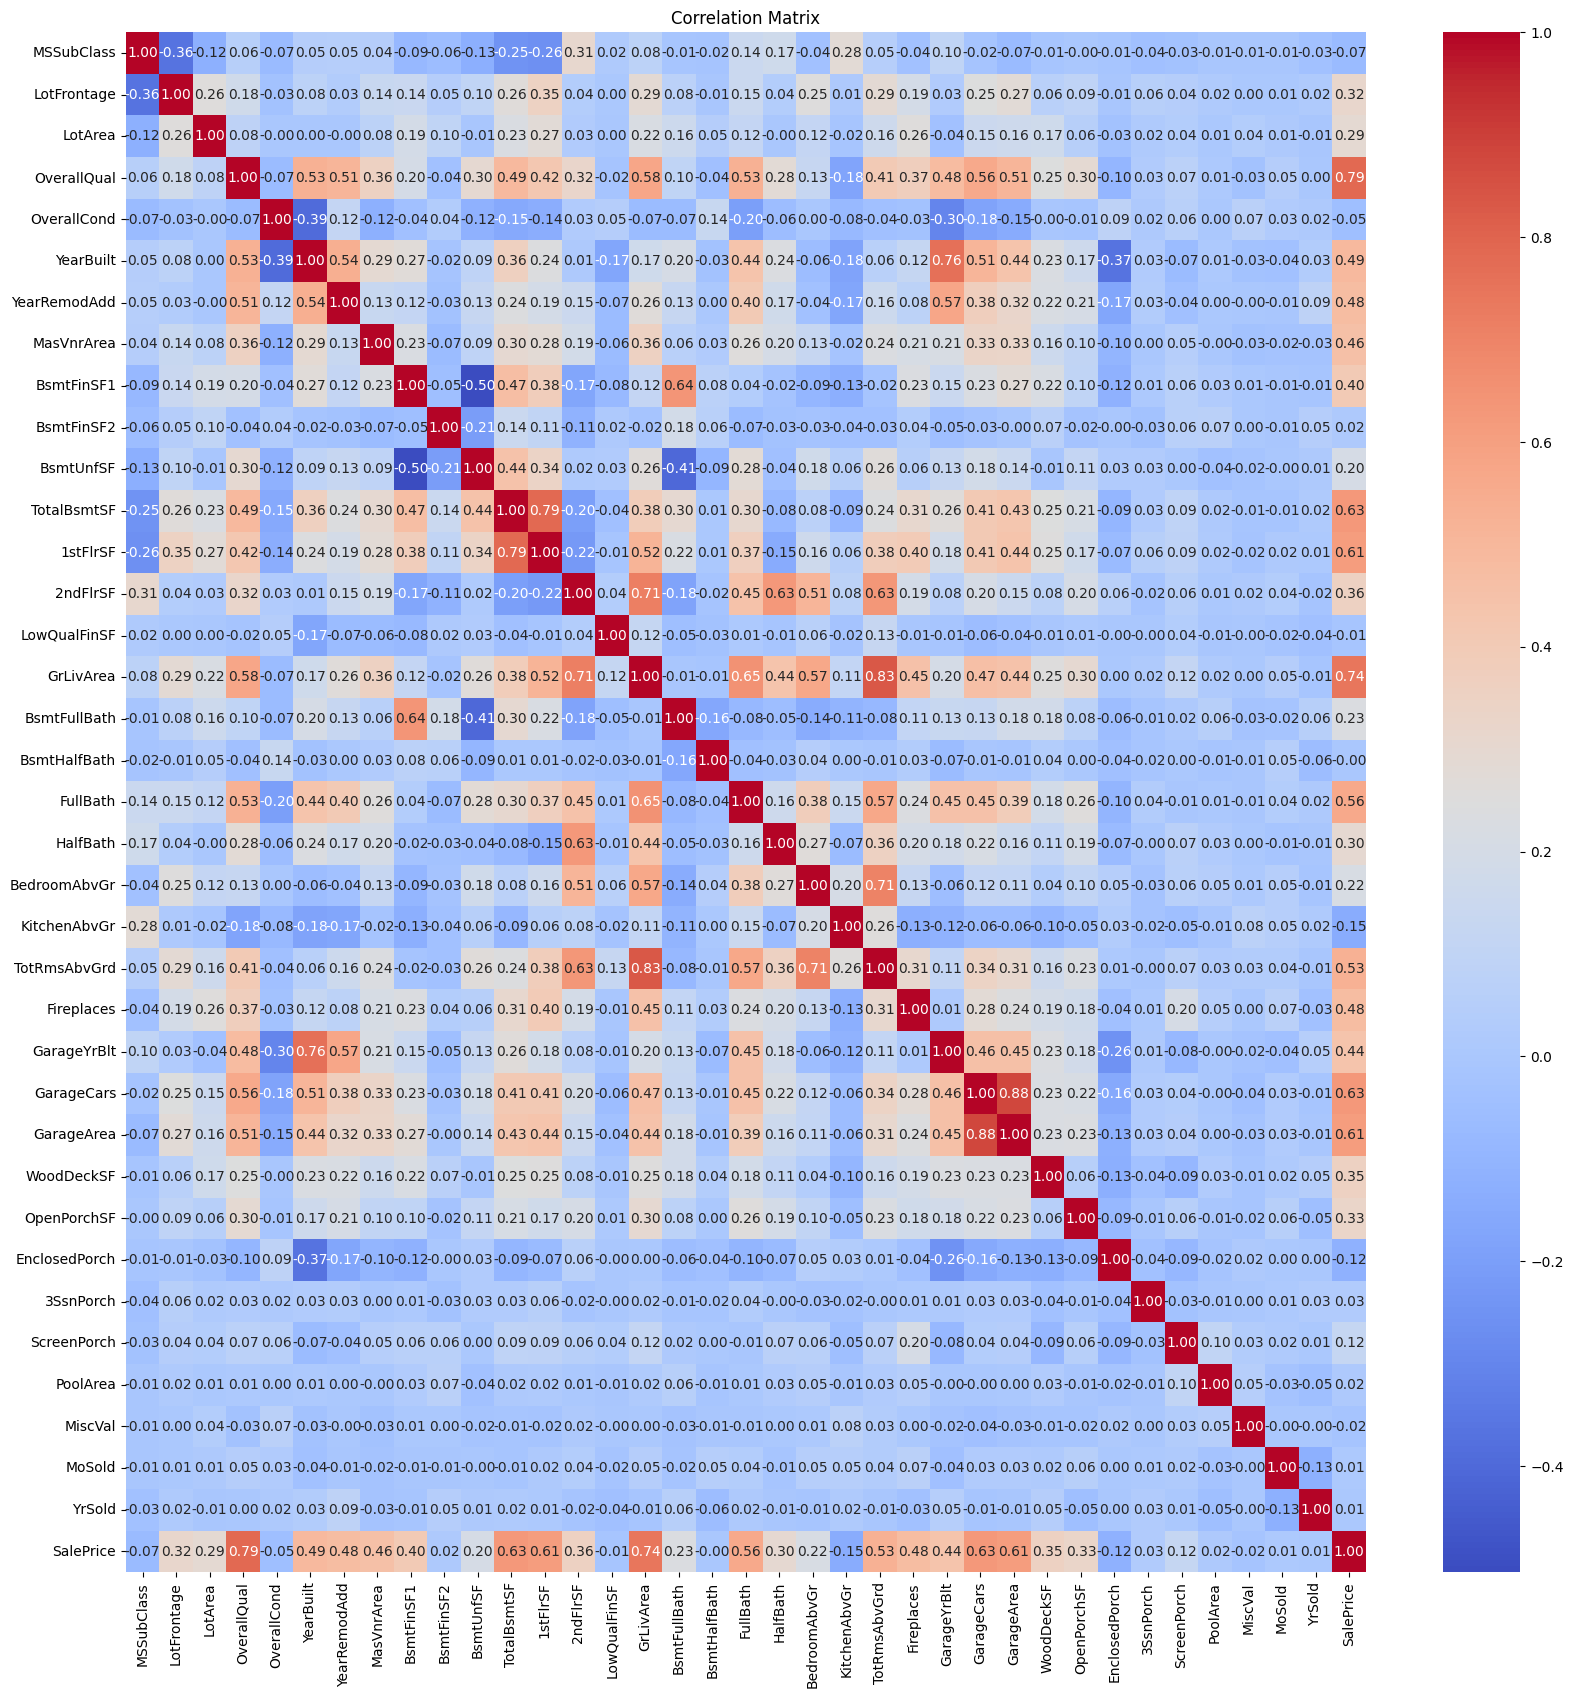

In [12]:
# Correlation matrix heatmap
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.786850
GrLivArea        0.744517
TotalBsmtSF      0.628819
GarageCars       0.626678
1stFlrSF         0.610918
GarageArea       0.608056
FullBath         0.562128
TotRmsAbvGrd     0.527860
YearBuilt        0.494597
YearRemodAdd     0.476759
Fireplaces       0.476356
MasVnrArea       0.457676
GarageYrBlt      0.437223
BsmtFinSF1       0.402999
2ndFlrSF         0.356561
WoodDeckSF       0.354374
OpenPorchSF      0.327241
LotFrontage      0.318663
HalfBath         0.298465
LotArea          0.293654
BsmtFullBath     0.234580
BedroomAbvGr     0.217707
BsmtUnfSF        0.204074
ScreenPorch      0.122665
3SsnPorch        0.027260
BsmtFinSF2       0.017308
PoolArea         0.016497
MoSold           0.010381
YrSold           0.006884
BsmtHalfBath    -0.000349
LowQualFinSF    -0.014440
MiscVal         -0.016608
OverallCond     -0.047430
MSSubClass      -0.072141
EnclosedPorch   -0.120773
KitchenAbvGr    -0.145114
Name: SalePrice, dtype: float64


As we suspected, features like year built and garage year built are highly correlated, as well as things like garagecars and garagearea. Also interesting to note that "overalqal" seems to be highly correlated with sales price, definitely a feature we are interested in. 

Let's drop any features with a correlation below 0.2

In [14]:
# Get the absolute correlation values with the target variable 'SalePrice'
correlation_with_target = corr_matrix["SalePrice"].abs()

# Identify columns with correlation less than 0.2
low_correlation_columns = correlation_with_target[correlation_with_target < 0.2].index

# Drop these columns from your dataset
df = df.drop(columns=low_correlation_columns)

print(f"Columns dropped: {list(low_correlation_columns)}")


Columns dropped: ['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Let's try examine some categorical features:

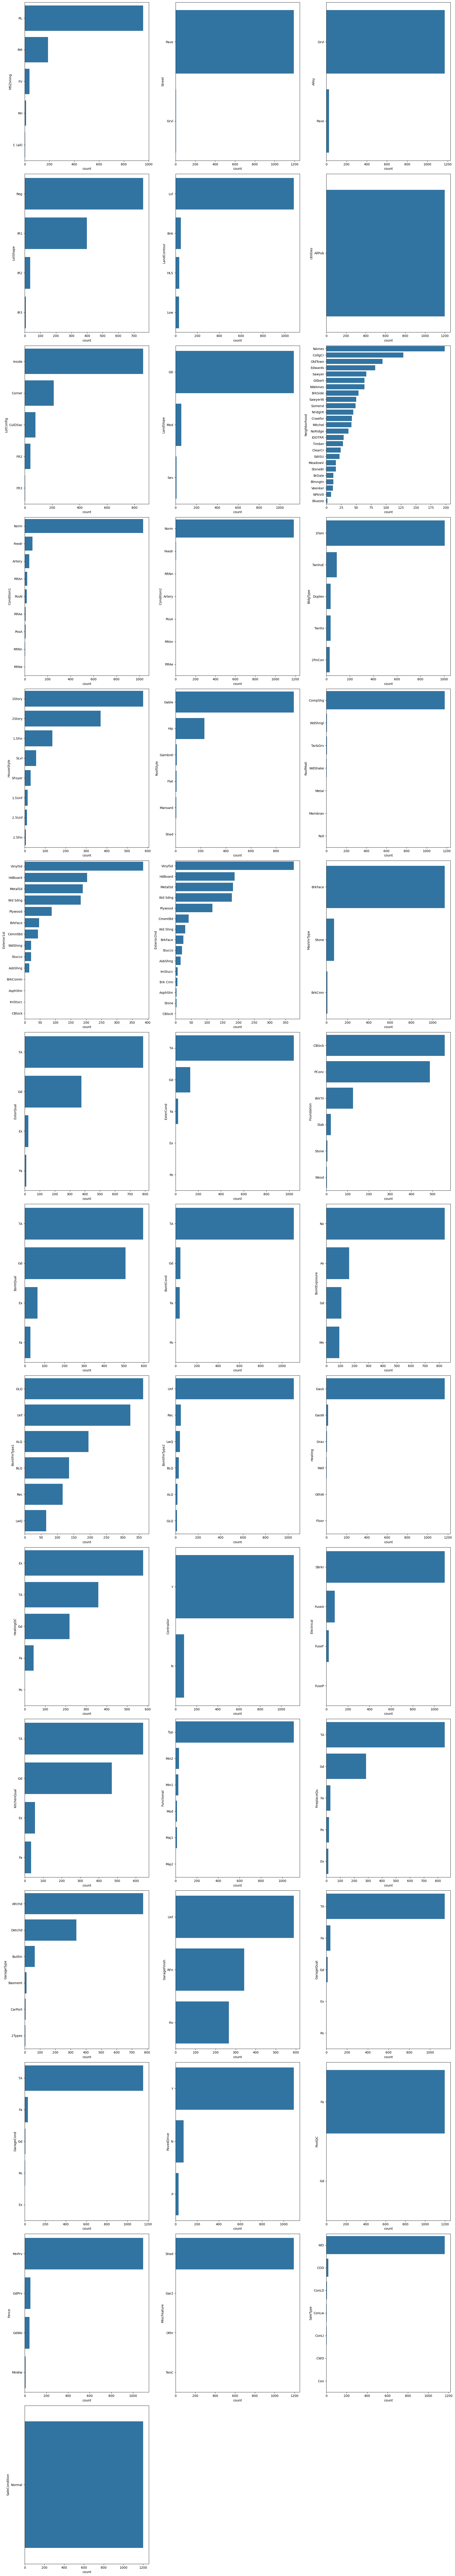

In [15]:

plt.figure(figsize=(20, 150))
for i, feature in enumerate(categorical_features):
    plt.subplot(20,3 , i+1)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.tight_layout()

I spent a long time trying to get the encoding to work but ultimately it was just to provide some insights. The XGboost and random forest models do not require us to encode so I am leaving this commented out for now}

These results are interesting:

Correlation of Ordinal Variables with SalePrice:
- SalePrice      1.000000
- OverallQual    0.542911
- ExterQual      0.471508
- KitchenQual    0.461899
- BsmtQual       0.443649
- HeatingQC      0.298020
- BsmtCond       0.113436
- GarageQual     0.108083
- GarageCond     0.083125
- Functional     0.076857
- Fence          0.057674
- ExterCond      0.011559
- PoolQC        -0.023770
- LandSlope     -0.045078
- Name: SalePrice, dtype: float64

In [16]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd

# Define ordinal and one-hot encoding features
ordinal_features = {
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageQual": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "PoolQC": ["NA", "Fa", "TA", "Gd", "Ex"],
    "Fence": ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"],
    "Functional": ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "LandSlope": ["Sev", "Mod", "Gtl"],
}

one_hot_features = [
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Foundation",
    "Heating",
    "CentralAir",
    "Electrical",
    "GarageType",
    "PavedDrive",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=list(ordinal_features.values()))
ordinal_encoded_df = pd.DataFrame(
    ordinal_encoder.fit_transform(df[ordinal_features.keys()]),
    columns=ordinal_features.keys(),
    index=df.index,
)

# Drop the original ordinal columns
df = df.drop(columns=ordinal_features.keys())

# Add ordinal-encoded columns
df = pd.concat([df, ordinal_encoded_df], axis=1)

# # One-Hot Encoding
# one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)  # Ensure dense output
# one_hot_encoded_array = one_hot_encoder.fit_transform(df[one_hot_features])
# one_hot_encoded_df = pd.DataFrame(
#     one_hot_encoded_array,
#     columns=one_hot_encoder.get_feature_names_out(one_hot_features),
#     index=df.index,
# )

# Drop the original one-hot columns
print(df.head())
df = df.drop(columns=one_hot_features)

# # Add one-hot-encoded columns
# df = pd.concat([df, one_hot_encoded_df], axis=1)

print("Encoding complete!")
# List of categorical features
old_categorical_features = df.select_dtypes(include=['object']).columns.tolist()
df.drop(columns=old_categorical_features, inplace=True)
print("Categorical Features:", categorical_features)


   MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
Id                                                                              
1        RL         65.0     8450   Pave  Grvl      Reg         Lvl    AllPub   
2        RL         80.0     9600   Pave  Grvl      Reg         Lvl    AllPub   
3        RL         68.0    11250   Pave  Grvl      IR1         Lvl    AllPub   
5        RL         84.0    14260   Pave  Grvl      IR1         Lvl    AllPub   
6        RL         85.0    14115   Pave  Grvl      IR1         Lvl    AllPub   

   LotConfig Neighborhood  ... BsmtQual BsmtCond HeatingQC KitchenQual  \
Id                         ...                                           
1     Inside      CollgCr  ...      4.0      3.0       4.0         3.0   
2        FR2      Veenker  ...      4.0      3.0       4.0         2.0   
3     Inside      CollgCr  ...      4.0      3.0       4.0         3.0   
5        FR2      NoRidge  ...      4.0      3.0       4.0    

We see that a lot of featurs do have an impact on sales price, some are even ordinal values which we should encode later to get a better idea of how the correlation looks with sales price.

## Dealing with Outliers
We will use some basic IQR methods to prevent outliers from skewing our dataset, although our set is not that large so we need to be careful about how much data we remove.

Given the large variance, it looks like the IQR method is going to remove too much of dataset, particularly looking at things like land square-footage. I am going to leave them in and see how the model performs, we can come back to this later.

In [17]:
from scipy.stats import zscore

# Calculate Z-scores for numerical features
z_scores = np.abs(zscore(df["SalePrice"]))

# Set the threshold for identifying outliers
threshold = 3

# Identify rows where any numerical feature exceeds the Z-score threshold
outliers = (z_scores > threshold)

# Remove outliers
df = df[~outliers]



In [18]:
from sklearn.model_selection import train_test_split


# Features and target variable
print(df.columns)
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Scaling numerical features
# scaler = StandardScaler()
# numerical_features.remove('SalePrice')
# X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])
# scaling was causing weird errors and making performance worse, removed it


Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
       'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'Functional', 'LandSlope'],
      dtype='object')


In [19]:
# Now the data is ready for modeling
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_valid.shape)


Training features shape: (947, 35)
Validation features shape: (237, 35)


In [20]:
X_train.to_csv("X_train.csv")
X_valid.to_csv("X_valid.csv")
y_train.to_csv("y_train.csv")
y_valid .to_csv("y_valid.csv")

In [21]:
df.head()

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
Id                                                                           
1          65.0     8450            7       2003          2003       196.0   
2          80.0     9600            6       1976          1976         0.0   
3          68.0    11250            7       2001          2002       162.0   
5          84.0    14260            8       2000          2000       350.0   
6          85.0    14115            5       1993          1995         0.0   

    BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  BsmtQual  BsmtCond  \
Id                                                ...                       
1          706        150          856       856  ...       4.0       3.0   
2          978        284         1262      1262  ...       4.0       3.0   
3          486        434          920       920  ...       4.0       3.0   
5          655        490         1145      1145  ...       4.0       3.0   
6          732         64          796       796  ...       4.0       3.0   

    HeatingQC  KitchenQual  GarageQual  GarageCond  PoolQC  Fence  Functional  \
Id                                                                              
1         4.0          3.0         3.0         3.0     1.0    3.0         7.0   
2         4.0          2.0         3.0         3.0     1.0    3.0         7.0   
3         4.0          3.0         3.0         3.0     1.0    3.0         7.0   
5         4.0          3.0         3.0         3.0     1.0    3.0         7.0   
6         4.0          2.0         3.0         3.0     1.0    3.0         7.0   

    LandSlope  
Id             
1         2.0  
2         2.0  
3         2.0  
5         2.0  
6         2.0  

[5 rows x 36 columns]